<a href="https://colab.research.google.com/github/Phoenix-Sun/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01%EF%BC%9A%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

專題實作 #01：鐵達尼號存活預測

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 讀取資料
train_df = pd.read_csv('https://raw.githubusercontent.com/Phoenix-Sun/titanic-analysis/1b26efb63eee075e733b13b8490b2848951ebd91/train.csv')

# 顯示前幾筆資料
print(train_df.head())

# 查看資料資訊，包含資料型態、是否有缺失值
print(train_df.info())

# 描述性統計
print(train_df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [14]:
# 處理缺失值 (簡單示範，可以根據情況調整)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# 將類別欄位轉換為數值
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 刪除不必要的欄位 (例如：Name, Ticket, Cabin)
train_df = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

<ipython-input-14-111ac87ec38c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-14-111ac87ec38c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

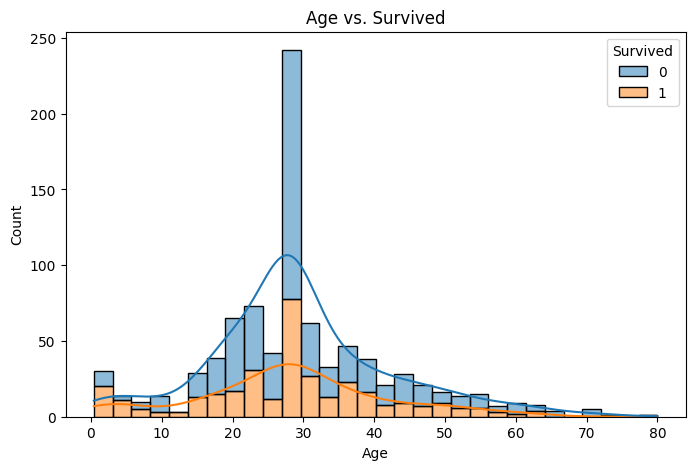

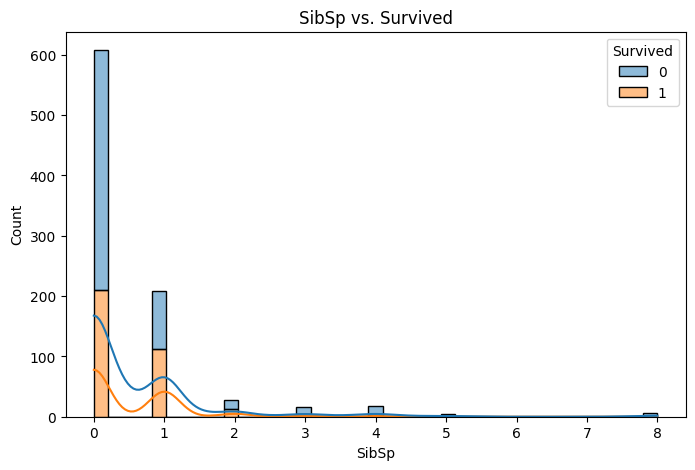

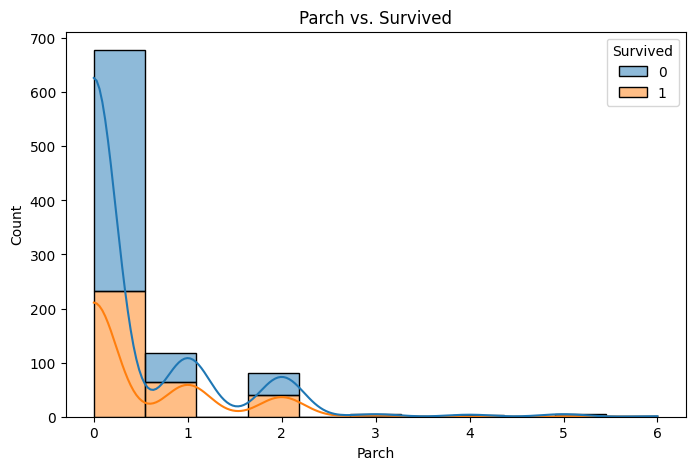

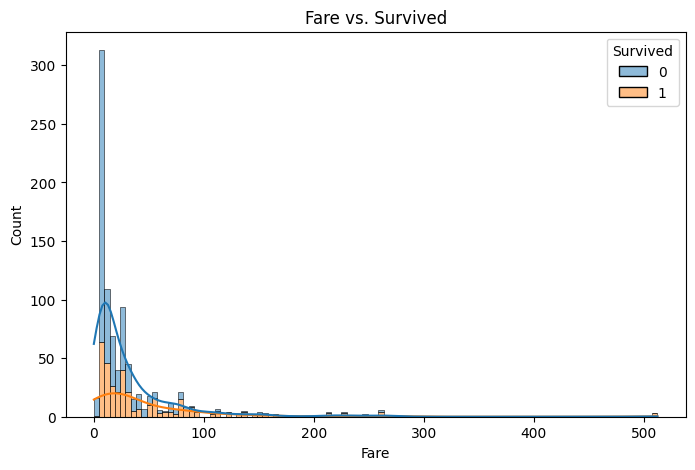

In [15]:
# 數值欄位與生存率的關聯
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=train_df, x=feature, hue='Survived', kde=True, multiple="stack")
    plt.title(f'{feature} vs. Survived')
    plt.show()

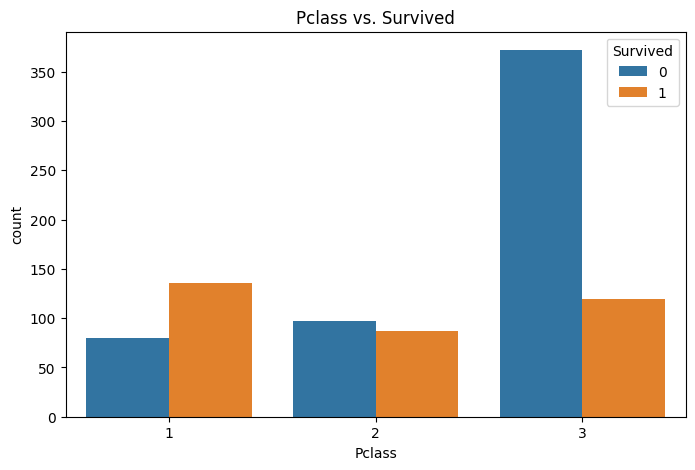

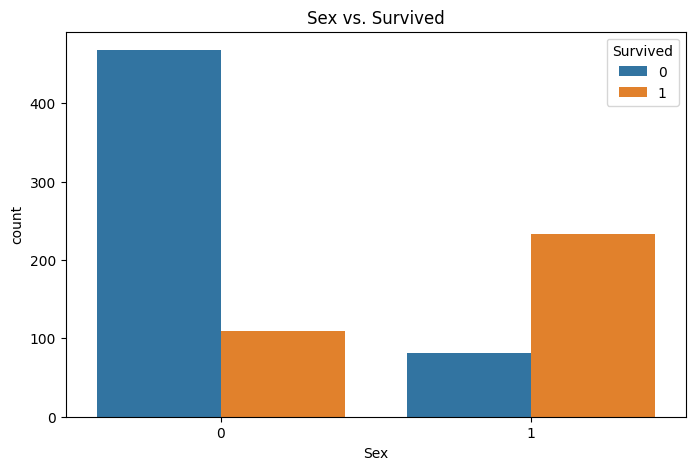

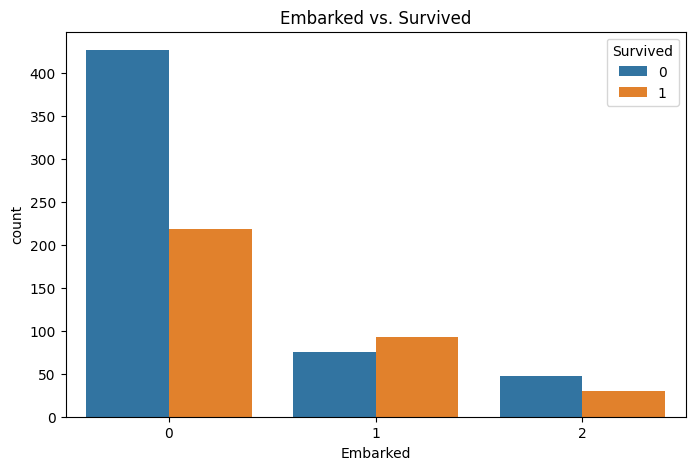

In [16]:
# 類別欄位與生存率的關聯
categorical_features = ['Pclass', 'Sex', 'Embarked']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_df, x=feature, hue='Survived')
    plt.title(f'{feature} vs. Survived')
    plt.show()

In [17]:
# 計算數值欄位與 Survived 的相關性
correlation = train_df.corr()['Survived'].sort_values(ascending=False)
print(correlation)

Survived       1.000000
Sex            0.543351
Fare           0.257307
Embarked       0.106811
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64


Sex            0.257114
PassengerId    0.198014
Fare           0.192336
Age            0.164777
Pclass         0.079702
SibSp          0.043360
Parch          0.032479
Embarked       0.032218
dtype: float64


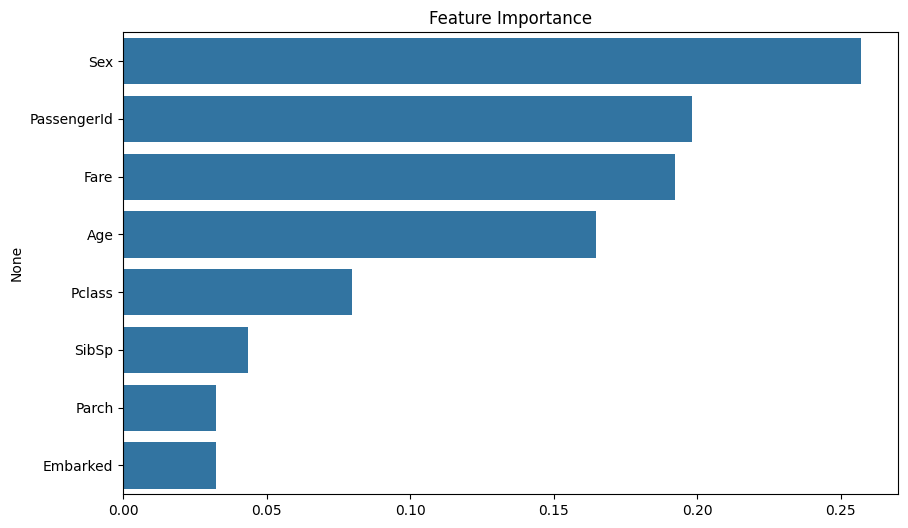

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 分割訓練資料與測試資料
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 Random Forest 模型
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 取得特徵重要性
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)

# 繪製特徵重要性圖表
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

<ipython-input-19-bc7f485aee21>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
<ipython-input-19-bc7f485aee21>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Sex         0.463430
Fare        0.164483
Pclass      0.141487
Age         0.106838
SibSp       0.054317
Parch       0.038926
Embarked    0.030519
dtype: float64


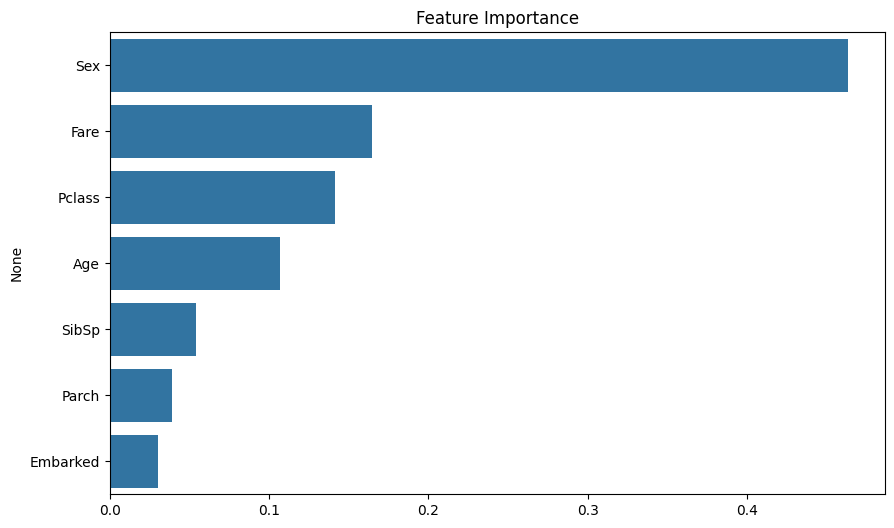

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# 讀取資料
train_df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

# 處理缺失值
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# 將類別欄位轉換為數值
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 刪除不必要的欄位，包含 PassengerId
train_df = train_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# 分割訓練資料與測試資料
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 Random Forest 模型 (調整參數)
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
model.fit(X_train, y_train)

# 取得特徵重要性
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importance)

# 繪製特徵重要性圖表
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Feature Importance')
plt.show()

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


# 讀取資料
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

# 刪除不必要的欄位
df_train = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# 處理缺失值
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

# 將類別欄位轉換為數值
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1})
df_train['Embarked'] = df_train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 移除重複值
df_train.drop_duplicates(inplace=True)

# 標準化數值欄位
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
scaler = StandardScaler()
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

# 準備模型輸入資料
columns_X = list(set(df_train.columns) - {'Survived'}) #將set轉成list
columns_y = ['Survived']


train_X = df_train[columns_X]
train_y = df_train[columns_y]


# 建立邏輯回歸模型並進行交叉驗證
log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
print(scores)

[0.77653631 0.79213483 0.78651685 0.76966292 0.80898876]


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 讀取資料
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')

# 刪除不必要的欄位
df_processed = df.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1)

# 處理缺失值
df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0], inplace=True)

# 將類別欄位轉換為數值
df_processed['Sex'] = df_processed['Sex'].map({'male': 0, 'female': 1})
df_processed['Embarked'] = df_processed['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# 特徵工程
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1  # 家庭成員總數
df_processed['IsAlone'] = np.where(df_processed['FamilySize'] == 1, 1, 0) # 是否獨自一人
df_processed['Age*Pclass'] = df_processed['Age'] * df_processed['Pclass']  # 年齡*艙等

# 標準化數值欄位
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize','Age*Pclass']
scaler = StandardScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

# 模型訓練與交叉驗證
columns_X = list(set(df_processed.columns) - {'Survived'})
columns_y = ['Survived']

train_X = df_processed[columns_X]
train_y = df_processed[columns_y]

log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(), cv=5, scoring='accuracy')
print(f'特徵工程後平均準確度: {scores.mean()}')

<ipython-input-4-1c1b5bf57ce9>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(df_processed['Age'].median(), inplace=True)
<ipython-input-4-1c1b5bf57ce9>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

特徵工程後平均準確度: 0.7901450003138535
